# Titanic Survivors Demo
* adapted from: https://blog.socialcops.com/engineering/machine-learning-python/

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 8.0)

In [144]:
# we can use CSV if xlrd is not installed
data = pd.read_excel('data/titanic3.xls', 'titanic3', index_col=None, na_values=['NA'])

## Legend
* pclass = Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* survival (0 = No; 1 = Yes)
* sibsp = number of Siblings/Spouses Aboard
* parch = number of Parents/Children Aboard
* ticket = ticket Number
* embarked (from...C = Cherbourg; Q = Queenstown; S = Southampton)
* boat = Lifeboat ID
* body = ID Number
* home.dest = Home/Destination

In [145]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## Feature selection: We only want to keep features which are predictive of the target
* these columns are unlikely to be meaningful and have several missing values so we'll drop them: boat, ticket, cabin, body

In [146]:
data = data.drop(columns=['boat', 'ticket', 'cabin', 'body'])

## We can get a quick summary of how many people survived

In [147]:
data['survived'].value_counts()

0    809
1    500
Name: survived, dtype: int64

## Because we encode survival as '1', finding the mean gives us survival percentage

In [25]:
data['survived'].mean()

0.3819709702062643

## If we group by passenger class and compute the mean, what does this reveal?

In [26]:
data.groupby('pclass').mean()

,survived,age,sibsp,parch,fare
pclass,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992
2,0.429603,29.506705,0.393502,0.368231,21.179196
3,0.255289,24.816367,0.568406,0.400564,13.302889


## .groupby() essentially creates a bunch of dataframes in which the all the columns match the various values of the grouping variables...
* we can see this by looking at the __`groups`__ attribute
* each grouping contains the rows of the dataframe
* so in the example below, rows 0, 2, 4, 6, 8, etc. are the females in 1st class

In [27]:
from pprint import pprint # "pretty printer"
pprint(data.groupby(['pclass', 'sex']).groups)

{(1, 'female'): Int64Index([  0,   2,   4,   6,   8,  11,  12,  13,  17,  18,
            ...
            297, 302, 304, 308, 309, 311, 314, 315, 319, 322],
           dtype='int64', length=144),
 (1, 'male'): Int64Index([  1,   3,   5,   7,   9,  10,  14,  15,  16,  19,
            ...
            306, 307, 310, 312, 313, 316, 317, 318, 320, 321],
           dtype='int64', length=179),
 (2, 'female'): Int64Index([324, 329, 333, 337, 340, 341, 342, 344, 349, 350,
            ...
            583, 584, 586, 588, 589, 590, 591, 593, 598, 599],
           dtype='int64', length=106),
 (2, 'male'): Int64Index([323, 325, 326, 327, 328, 330, 331, 332, 334, 335,
            ...
            578, 579, 581, 585, 587, 592, 594, 595, 596, 597],
           dtype='int64', length=171),
 (3, 'female'): Int64Index([ 603,  604,  607,  610,  612,  621,  623,  624,  625,  626,
            ...
            1265, 1267, 1273, 1276, 1279, 1286, 1290, 1300, 1304, 1305],
           dtype='int64', length=216),
 (3,

## If we group by class and sex and compute the mean, what does this tell us about the "Women" part of "Women and children first?"

In [28]:
class_sex_grouping = data.groupby(['pclass', 'sex']).mean()
class_sex_grouping

survived        age     sibsp     parch        fare
pclass sex                                                        
1      female  0.965278  37.037594  0.555556  0.472222  109.412385
       male    0.340782  41.029250  0.340782  0.279330   69.888385
2      female  0.886792  27.499191  0.500000  0.650943   23.234827
       male    0.146199  30.815401  0.327485  0.192982   19.904946
3      female  0.490741  22.185307  0.791667  0.731481   15.324250
       male    0.152130  25.962273  0.470588  0.255578   12.415462

## Let's render it as a bar chart to make it clear...

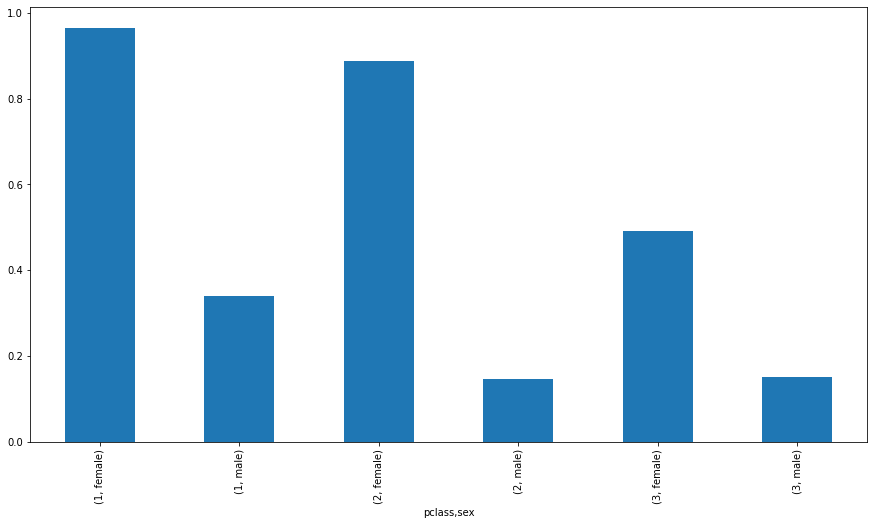

In [29]:
class_sex_grouping['survived'].plot.bar();

## If we group by age, we can investigate the "Children" part of "Women and children first"

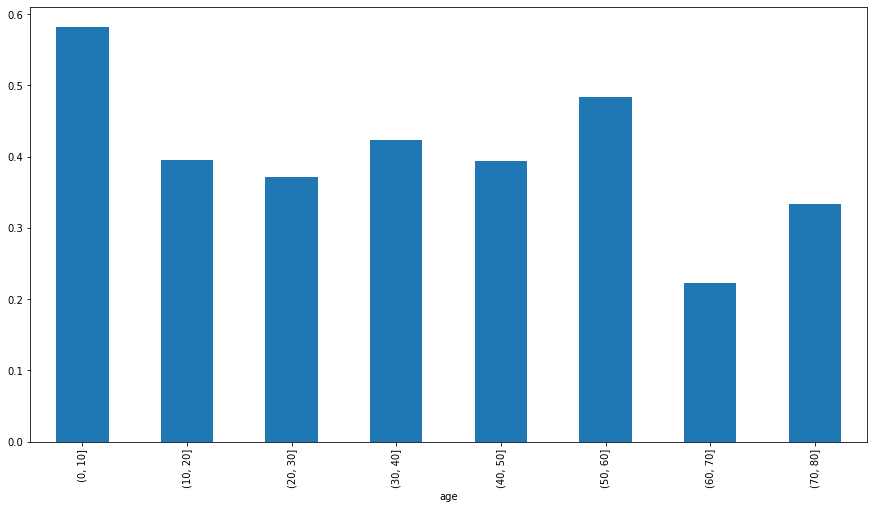

In [30]:
group_by_age = pd.cut(data.age, np.arange(0, 90, 10))
age_grouping = data.groupby(group_by_age).mean()
age_grouping['survived'].plot.bar();

In [31]:
group_by_age.value_counts()

(20, 30]    361
(30, 40]    210
(10, 20]    162
(40, 50]    132
(0, 10]      86
(50, 60]     62
(60, 70]     27
(70, 80]      6
Name: age, dtype: int64

## A lot of missing data...

In [13]:
data.count()

pclass       1309
survived     1309
name         1309
sex          1309
age          1046
sibsp        1309
parch        1309
fare         1308
embarked     1307
home.dest     745
dtype: int64

## We can fill in the missing age values with averages
* Is this a good strategy for this data?
* What could we exploit to make a better go of it? (Hint: Look at the class breakdowns above)

In [148]:
data = data.fillna(data.mean())

/var/folders/ql/47q61rdn36s25sll78vrkt080000gq/T/ipykernel_1366/476127175.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.mean())


## Now we are basically missing home/destination data and a few embarked results

In [149]:
data.count()

pclass       1309
survived     1309
name         1309
sex          1309
age          1309
sibsp        1309
parch        1309
fare         1309
embarked     1307
home.dest     745
dtype: int64

## With only two results missing embarked data, we can probably just drop those samples

In [150]:
data[data['embarked'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,home.dest
168,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,NaN,NaN
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,NaN,"Cincinatti, OH"


## There are a substantial number of missing home/destination values
* We don't know if that is an important feature, but we'd lose a lot of data if we throw those samples away, so let's fill it in with placeholders for now

In [151]:
data["home.dest"] = data["home.dest"].fillna("NA")

## Now with only the two embarked rows missing, we are in good shape, so let's drop those and then move on

In [152]:
data.count()

pclass       1309
survived     1309
name         1309
sex          1309
age          1309
sibsp        1309
parch        1309
fare         1309
embarked     1307
home.dest    1309
dtype: int64

In [154]:
data = data.dropna()

In [155]:
data.count()

pclass       1307
survived     1307
name         1307
sex          1307
age          1307
sibsp        1307
parch        1307
fare         1307
embarked     1307
home.dest    1307
dtype: int64

## We turn categorical data (__`sex`__ and __`embarked`__) into numbers values using a Sci-Kit Learn __`LabelEncoder`__
* or we can use the __`.get_dummies()`__ function, but __`LabelEncoder`__ will be cleaner here

In [156]:
from sklearn import datasets, svm, model_selection, tree, preprocessing, metrics

In [161]:
def preprocess_titanic_df(df):
    processed_df = df.copy() # make a copy of the dataframe
    le = preprocessing.LabelEncoder() # create a label encoder
    
    processed_df.sex = le.fit_transform(processed_df.sex) # female = 0, male = 1
    processed_df.embarked = le.fit_transform(processed_df.embarked) 
    processed_df = processed_df.drop(columns='name home.dest'.split())
    return processed_df

## Preprocess our data, then verify that everything is suitable for an ML activity

In [160]:
processed_df = preprocess_titanic_df(data)
processed_df.head()

['C' 'Q' 'S']


,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,0,29.0000,0,0,211.3375,2
1,1,1,1,0.9167,1,2,151.5500,2
2,1,0,0,2.0000,1,2,151.5500,2
3,1,0,1,30.0000,1,2,151.5500,2
4,1,0,0,25.0000,1,2,151.5500,2


### The survival data is going to be our target so we drop it from the feature matrix and set up the target matrix.

In [26]:
X = processed_df.drop(['survived'], axis=1)
y = processed_df['survived']

### We now split our data into training and test data, create a DecisionTreeClassifier and then see how we do on predictions on survival.

In [27]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

In [28]:
clf_dt = tree.DecisionTreeClassifier(max_depth=2)

In [29]:
clf_dt.fit(X_train, y_train)
clf_dt.score(X_test, y_test)

0.8015267175572519

In [30]:
from sklearn.tree import export_graphviz
export_graphviz(clf_dt, out_file="titanic.dot",
               feature_names='pclass sex age sibsp parch fare embarked'.split(),
               class_names='died survived'.split(),
               rounded=True,filled=True)

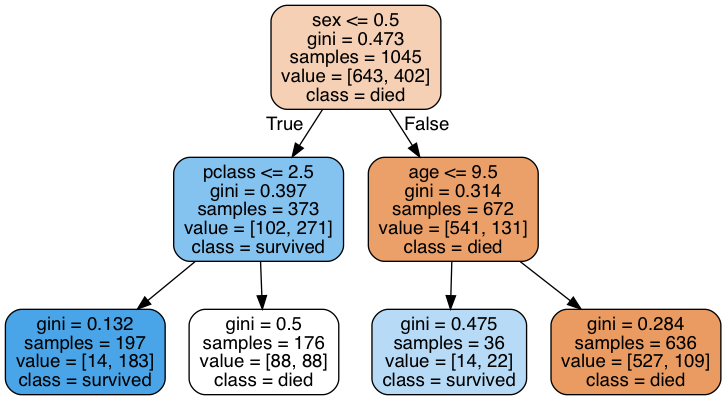

In [31]:
!dot -Tpng titanic.dot -o titanic.png
from IPython.display import Image
Image('titanic.png')

### Now we want to make a specific point, so we'll grab the first twenty rows of each passenger class from our raw data, clean them up and use them as our test data.

In [36]:
passengers_set_1 = data[data.pclass == 1].iloc[:20,:].copy()
passengers_set_2 = data[data.pclass == 2].iloc[:20,:].copy()
passengers_set_3 = data[data.pclass == 3].iloc[:20,:].copy()
passenger_set = pd.concat([passengers_set_1, passengers_set_2, passengers_set_3])
testing_set = preprocess_titanic_df(passenger_set)

### Normally you wouldn't train and test on the same data, but we're trying to make a point (and this is a closed system–we're not going to use our model on new, unseen data!)

In [37]:
training_set = pd.concat([data, passenger_set]).drop_duplicates(keep=False)
training_set = preprocess_titanic_df(training_set)

In [38]:
X = training_set.drop(['survived'], axis=1).values
y = training_set['survived'].values
X_test = testing_set.drop(['survived'], axis=1).values
y_test = testing_set['survived'].values

In [39]:
clf_rf = ske.RandomForestClassifier(n_estimators=50)
clf_rf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [40]:
prediction = clf_rf.predict(X_test)
prediction

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

### Because this is historical data, we can compare predictions to what actually happened.
* Models are not destiny!
* ...some of the people our model thought would survive didn't and some of the people it thought wouldn't did.

In [41]:
passenger_set[passenger_set.survived != prediction]

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,home.dest
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,151.5500,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,151.5500,S,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0,0,0,26.5500,S,"New York, NY"
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,30.0000,S,"Hessle, Yorks"
336,2,1,"Beane, Mr. Edward",male,32.0,1,0,26.0000,S,"Norwich / New York, NY"
605,3,1,"Abelseth, Mr. Olaus Jorgensen",male,25.0,0,0,7.6500,S,"Perkins County, SD"
606,3,1,"Abrahamsson, Mr. Abraham August Johannes",male,20.0,0,0,7.9250,S,"Taalintehdas, Finland Hoboken, NJ"
612,3,1,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,9.3500,S,"London, England Norfolk, VA"
613,3,1,"Albimona, Mr. Nassef Cassem",male,26.0,0,0,18.7875,C,"Syria Fredericksburg, VA"


In [42]:
clf_rf.score(X_test, y_test) # 51 / 60

0.85